In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [3]:
diabets_classes = pd.read_csv('../../DATA/diabets_classes.csv', index_col=False)
diabets_x = diabets_classes.drop(['diabets'], axis=1)
diabets = diabets_classes['diabets']
pre_diabets_classes = pd.read_csv('../../DATA/pre_diabets_classes.csv', index_col=False)
pre_diabets_x = pre_diabets_classes.drop(['pre_diabets'], axis=1)
pre_diabets = pre_diabets_classes['pre_diabets']
non_diabets_classes = pd.read_csv('../../DATA/non_diabets_classes.csv', index_col=False)
non_diabets_x = non_diabets_classes.drop(['non_diabets'], axis=1)
non_diabets = non_diabets_classes['non_diabets']


In [7]:
x_diabets_train, x_diabets_test, y_diabets_train, y_diabets_test = train_test_split(diabets_x, diabets, test_size=0.25)
x_pre_diabets_train, x_pre_diabets_test, y_pre_diabets_train, y_pre_diabets_test = train_test_split(pre_diabets_x, pre_diabets, test_size=0.25)
x_non_diabets_train, x_non_diabets_test, y_non_diabets_train, y_non_diabets_test = train_test_split(non_diabets_x, non_diabets, test_size=0.25)

In [17]:
def show_regression_params(lr, c):
    print(abs(lr.best_estimator_.coef_).mean(axis=0))
    plt.bar(c, abs(lr.best_estimator_.coef_).mean(axis=0))
    plt.xticks(rotation=90)
    plt.axhline(abs(lr.best_estimator_.coef_).mean(axis=0).mean(), color='red')
    plt.axhline(np.median(abs(lr.best_estimator_.coef_).mean(axis=0)), color='green')


# Diabets KNN

In [18]:
diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                        {'C': [1e-5, 1e-4, 1e-3,
                                               1e-2, 1e-1, 1, 10, 100]},
                                        n_jobs=4,
                                        scoring='accuracy'
                                        ).fit(x_diabets_train, y_diabets_train)

# 6 min


In [9]:
diabets_predict = diabets_classifier.predict(x_diabets_test)
# 1 min


[0.19096575 0.49197131 0.70949874 4.12778925 0.04828158 0.31402813
 0.85292816 0.27603502 1.4462878  0.49967465]


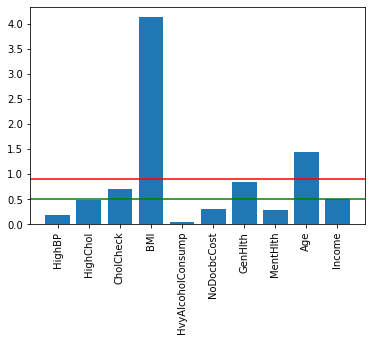

In [19]:
show_regression_params(diabets_classifier, x_diabets_train.columns)


In [10]:
print(classification_report(diabets_predict, y_diabets_test))


              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66      1102
         1.0       0.69      0.66      0.67      1214

    accuracy                           0.67      2316
   macro avg       0.67      0.67      0.67      2316
weighted avg       0.67      0.67      0.67      2316



# Prediabets KNN

In [11]:
pre_diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                              {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
                                              n_jobs=4,
                                              scoring='accuracy'
                                              ).fit(x_pre_diabets_train, y_pre_diabets_train)
# 6 min


In [ ]:
GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                              {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
                                              n_jobs=4,
                                              scoring='accuracy'
                                              ).fit(x_pre_diabets_train, y_pre_diabets_train)
# 6 min


In [12]:
pre_diabets_predict = diabets_classifier.predict(x_pre_diabets_test)
# 1 min


[0.77381928 0.61596262 1.36597503 6.31911083 0.70651607 0.02514007
 2.38805615 0.22094104 1.84624413 0.41161798]


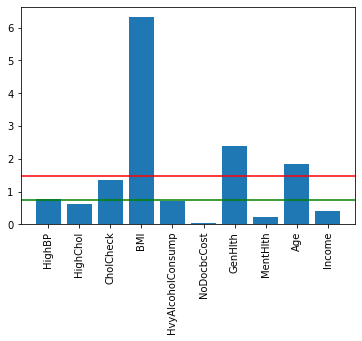

In [20]:
show_regression_params(pre_diabets_classifier, x_pre_diabets_train.columns)


In [13]:
print(classification_report(pre_diabets_predict, y_pre_diabets_test))


              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72      7999
         1.0       0.78      0.72      0.75      9674

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



# Nondiabets KNN

In [14]:
non_diabets_classifier = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'),
                                      {'C': [1e-5, 1e-4, 1e-3,
                                             1e-2, 1e-1, 1, 10, 100]},
                                      n_jobs=4,
                                      scoring='accuracy'
                                      ).fit(x_non_diabets_train, y_non_diabets_train)


[0.73960918 0.63018559 1.18695056 5.28869504 0.69752153 0.05973095
 2.12487202 0.13389158 1.55413361 0.40498608]


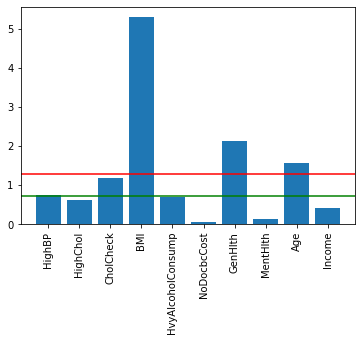

In [21]:
show_regression_params(non_diabets_classifier, x_non_diabets_train.columns)


In [15]:
non_diabets_predict = diabets_classifier.predict(x_non_diabets_test)
# 1 min


In [16]:
print(classification_report(non_diabets_predict, y_non_diabets_test))


              precision    recall  f1-score   support

         0.0       0.23      0.06      0.09     39238
         1.0       0.31      0.68      0.42     24182

    accuracy                           0.29     63420
   macro avg       0.27      0.37      0.26     63420
weighted avg       0.26      0.29      0.22     63420

